In [5]:
text = "This is my test text. We're keeping this text short to keep things manageable."

def count_words(text):
    """
    Count the number of tims each word occurs in text (str).
    Return dictionary where keys are unique words and values are word counts.
    Skip punctuations.
    """
    text = text.lower()
    skips = [".",",",";",":","'",'"']
    for ch in skips:
        text = text.replace(ch,"")

    word_counts = {}
    for word in text.split(" "):
        # known word
        if word in word_counts:
            word_counts[word] += 1
        # unknown word
        else:
            word_counts[word] = 1
    return word_counts

In [6]:
count_words(text)

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

In [7]:
from collections import Counter

def count_words_fast(text):
    """
    Count the number of tims each word occurs in text (str).
    Return dictionary where keys are unique words and values are word counts.
    Skip punctuations.
    """
    text = text.lower()
    skips = [".",",",";",":","'",'"']
    for ch in skips:
        text = text.replace(ch,"")

    word_counts = Counter(text.split(" "))
    return word_counts

In [8]:
count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

In [11]:
print(count_words(text) == count_words_fast(text))
print(count_words(text) is count_words_fast(text))

True
False


In [10]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [19]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return text

In [32]:
text = read_book(".\Books\English\shakespeare\Romeo and Juliet.txt")
len(text)

169275

In [21]:
ind = text.find("What's in a name?")
ind

42757

In [22]:
sample_text = text[ind : ind + 1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [23]:
def word_stats(word_counts):
    """
    Return number of unique words and word frequencies.
    """
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [33]:
text = read_book(".\Books\English\shakespeare\Romeo and Juliet.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
#number of unique words
print(num_unique)
#list of word counts
print(sum(counts))

5118
40776


In [34]:
text = read_book(".\Books\German\shakespeare\Romeo und Julia.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
#number of unique words
print(num_unique)
#list of word counts
print(sum(counts))

7527
20311


In [63]:
import os
book_dir = "./Books"

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))

<class 'list'>
./Books/English/shakespeare/A Midsummer Night's Dream.txt
./Books/English/shakespeare/Hamlet.txt
./Books/English/shakespeare/Macbeth.txt
./Books/English/shakespeare/Othello.txt
./Books/English/shakespeare/Richard III.txt
./Books/English/shakespeare/Romeo and Juliet.txt
./Books/English/shakespeare/The Merchant of Venice.txt
./Books/French/chevalier/L'åle de sable.txt
./Books/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./Books/French/chevalier/La capitaine.txt
./Books/French/chevalier/La fille des indiens rouges.txt
./Books/French/chevalier/La fille du pirate.txt
./Books/French/chevalier/Le chasseur noir.txt
./Books/French/chevalier/Les derniers Iroquois.txt
./Books/French/de Maupassant/Boule de Suif.txt
./Books/French/de Maupassant/Claire de Lune.txt
./Books/French/de Maupassant/Contes de la Becasse.txt
./Books/French/de Maupassant/L'inutile beautÇ.txt
./Books/French/de Maupassant/La Main Gauche.txt
./Books/French/de Maupassant/La Maison Tellier.txt
./Bo

In [44]:
import pandas as pd
table = pd.DataFrame(columns = ("name", "age"))
table.loc[1] = "James", 22
table.loc[2] = "Jess", 32
print(table)
print(table.columns)

    name age
1  James  22
2   Jess  32
Index(['name', 'age'], dtype='object')


In [60]:
import pandas as pd
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique
            title_num += 1

print(stats)

       language       author                      title  length unique
1       English  Shakespeare  A Midsummer Night's Dream   16103   4345
2       English  Shakespeare                     Hamlet   28551   6776
3       English  Shakespeare                    Macbeth   16874   4780
4       English  Shakespeare                    Othello   26590   5898
5       English  Shakespeare                Richard III   48315   5449
..          ...          ...                        ...     ...    ...
98   Portuguese      Queir¢s     O crime do padre Amaro  128630  29300
99   Portuguese      Queir¢s                 O Mandarim   21440   7836
100  Portuguese      Queir¢s            O Primo Bazilio  107303  27644
101  Portuguese      Queir¢s                   Os Maias  195771  40665
102  Portuguese  Shakespeare                     Hamlet   30567   9700

[102 rows x 5 columns]


In [61]:
stats.head()

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449


In [62]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir¢s,O crime do padre Amaro,128630,29300
99,Portuguese,Queir¢s,O Mandarim,21440,7836
100,Portuguese,Queir¢s,O Primo Bazilio,107303,27644
101,Portuguese,Queir¢s,Os Maias,195771,40665
102,Portuguese,Shakespeare,Hamlet,30567,9700


In [64]:
stats.length

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: length, Length: 102, dtype: object

In [65]:
stats.unique

1       4345
2       6776
3       4780
4       5898
5       5449
       ...  
98     29300
99      7836
100    27644
101    40665
102     9700
Name: unique, Length: 102, dtype: object

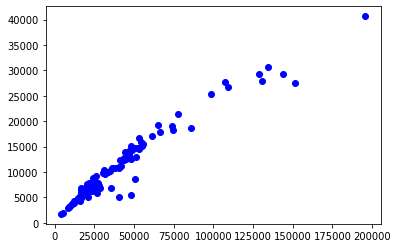

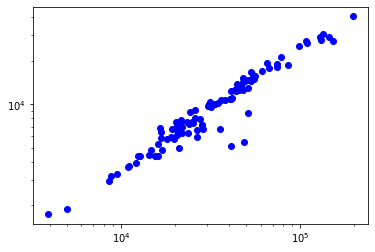

In [68]:
import matplotlib.pyplot as plt
plt.plot(stats.length, stats.unique, "bo")
plt.show()
plt.loglog(stats.length, stats.unique, "bo")
plt.show()

In [71]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978


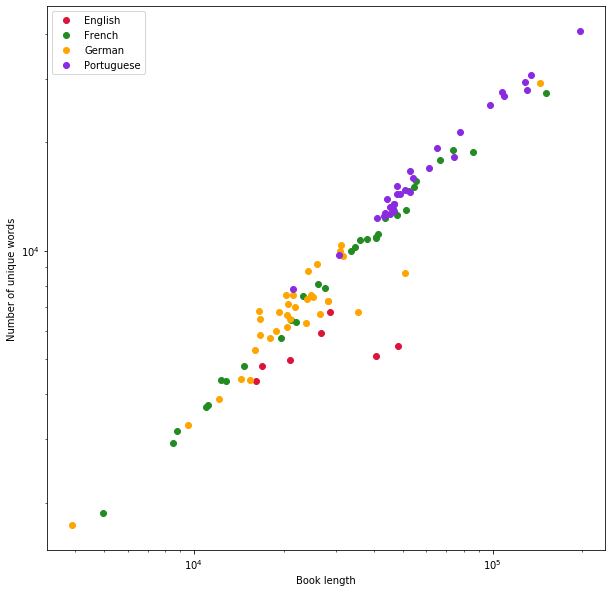

In [75]:
plt.figure(figsize = (10, 10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")